In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import operator
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, homogeneity_score, mutual_info_score
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')
df_pop = pd.read_csv('telecom_zipcode_population.csv')

In [3]:
df['Zip Code'] = df['Zip Code'].astype('object')
df_pop['Zip Code'] = df_pop['Zip Code'].astype('object')

In [4]:
df = df.merge(df_pop, on = 'Zip Code', how = 'left')

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Population'],
      dtype='object')

In [6]:
len(df)

7043

In [7]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Customer ID - Unique Values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Column: Gender - Unique Values: ['Female' 'Male']
Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Column: Married - Unique Values: ['Yes' 'No']
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8]
Column: City - Unique Values: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Column: Zip Code - Unique Values: [93225 91206 92627 ... 91934 93013 95956]
Column: Latitude - Unique Values: [34.827662 34.162515 33.645672 ... 32.649787 34.441398 39.937017]
Column: Longitude - Unique Values: [-118.999073 -118.203869 -117.922613 ... -116.2237   -119.513163
 -121.058043]
Column: Number of Referrals - Unique Values: [ 2  0  1  3  8  9 10  5  4  7  6 11]
Column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [9]:
int_cols = ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
           'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 
            'Total Long Distance Charges', 'Total Revenue', 'Charge Difference', 'Population']

In [10]:
df['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [11]:
df[df['Churn Reason'] == "Don't know"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 21 to 6953
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        130 non-null    object 
 1   Gender                             130 non-null    object 
 2   Age                                130 non-null    int64  
 3   Married                            130 non-null    object 
 4   Number of Dependents               130 non-null    int64  
 5   City                               130 non-null    object 
 6   Zip Code                           130 non-null    object 
 7   Latitude                           130 non-null    float64
 8   Longitude                          130 non-null    float64
 9   Number of Referrals                130 non-null    int64  
 10  Tenure in Months                   130 non-null    int64  
 11  Offer                              41 non-null     object 
 1

In [12]:
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [13]:
df[df['Customer Status'] == 'Joined'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 17 to 7040
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        454 non-null    object 
 1   Gender                             454 non-null    object 
 2   Age                                454 non-null    int64  
 3   Married                            454 non-null    object 
 4   Number of Dependents               454 non-null    int64  
 5   City                               454 non-null    object 
 6   Zip Code                           454 non-null    object 
 7   Latitude                           454 non-null    float64
 8   Longitude                          454 non-null    float64
 9   Number of Referrals                454 non-null    int64  
 10  Tenure in Months                   454 non-null    int64  
 11  Offer                              175 non-null    object 
 1

In [14]:
# Addition of customer not part of the exercise
# No duplicate id's...assuming that "Joined" cannot have a churn option

df_status = df[df['Customer Status'] != 'Joined']

In [15]:
df_status['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [16]:
df_status['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Name: count, dtype: int64

In [17]:
# Removing Deceased as a involuntary churn
# Droping extra churn columns bc they are no longer needed

df_3 = df_status[df_status['Churn Reason'] != 'Deceased'].drop(['Churn Category', 'Churn Reason'], axis = 1)

In [18]:
#Inspect nans again for customers without internet or phone service

for column in df_3.columns:
    print('Column: {} - Unique Values: {} - Nans: {}'.format(column, df_3[column].unique(), df_3[column].isna().sum()))

Column: Customer ID - Unique Values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-RRAMN' '9993-LHIEB'
 '9995-HOTOH'] - Nans: 0
Column: Gender - Unique Values: ['Female' 'Male'] - Nans: 0
Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65] - Nans: 0
Column: Married - Unique Values: ['Yes' 'No'] - Nans: 0
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8] - Nans: 0
Column: City - Unique Values: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Kirkwood' 'Carpinteria'
 'Meadow Valley'] - Nans: 0
Column: Zip Code - Unique Values: [93225 91206 92627 ... 93013 95050 95956] - Nans: 0
Column: Latitude - Unique Values: [34.827662 34.162515 33.645672 ... 34.441398 37.351214 39.937017] - Nans: 0
Column: Longitude - Unique Values: [-118.999073 -118.203869 -117.922613 ... -119.513163 -121.952417
 -121.058043] - Nans: 

In [19]:
# Many nans dependent on whether the customer had data or not
df_3[df_3['Internet Service'] == 'No']

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Population
20,0023-UYUPN,Female,79,Yes,0,Ahwahnee,93601,37.375816,-119.739935,0,...,No,Bank Withdrawal,25.20,1306.30,0.00,0,1571.50,2877.80,Stayed,1968
24,0031-PVLZI,Female,34,Yes,0,Korbel,95550,40.766600,-123.804580,0,...,No,Credit Card,20.35,76.35,0.00,0,49.72,126.07,Churned,155
27,0040-HALCW,Male,42,Yes,3,Modesto,95358,37.612612,-121.108568,3,...,No,Credit Card,20.40,1090.60,0.00,0,1063.80,2154.40,Stayed,30668
28,0042-JVWOJ,Male,64,No,0,Glen Ellen,95442,38.368744,-122.522642,0,...,Yes,Bank Withdrawal,19.60,471.85,21.25,0,980.20,1430.80,Stayed,4101
29,0042-RLHYP,Female,47,Yes,3,Eureka,95503,40.737431,-124.108897,5,...,No,Bank Withdrawal,19.70,1396.90,0.00,0,2648.91,4045.81,Stayed,23570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,9967-ATRFS,Female,47,No,0,Calipatria,92233,33.143826,-115.497485,0,...,No,Credit Card,19.90,367.55,0.00,0,608.57,976.12,Stayed,7857
7026,9970-QBCDA,Female,50,No,0,March Air Reserve Base,92518,33.888323,-117.277533,0,...,No,Credit Card,19.70,129.55,0.00,0,186.12,315.67,Stayed,1005
7028,9972-EWRJS,Female,56,Yes,1,Meadow Valley,95956,39.937017,-121.058043,2,...,Yes,Bank Withdrawal,19.25,1372.90,0.00,0,3266.25,4639.15,Stayed,301
7032,9975-GPKZU,Male,62,Yes,3,Alameda,94501,37.774633,-122.274434,0,...,No,Credit Card,19.75,856.50,0.00,0,352.82,1209.32,Stayed,58555


In [20]:
new_none = ['Offer','Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
               'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
new_zero = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

df_3[new_none] = df_3[new_none].fillna('None')
df_3[new_zero] = df_3[new_zero].fillna(0)

In [21]:
for column in df_3.columns:
    print('Column: {} - Unique Values: {} - Nans: {}'.format(column, df_3[column].unique(), df_3[column].isna().sum()))

Column: Customer ID - Unique Values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-RRAMN' '9993-LHIEB'
 '9995-HOTOH'] - Nans: 0
Column: Gender - Unique Values: ['Female' 'Male'] - Nans: 0
Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65] - Nans: 0
Column: Married - Unique Values: ['Yes' 'No'] - Nans: 0
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8] - Nans: 0
Column: City - Unique Values: ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Kirkwood' 'Carpinteria'
 'Meadow Valley'] - Nans: 0
Column: Zip Code - Unique Values: [93225 91206 92627 ... 93013 95050 95956] - Nans: 0
Column: Latitude - Unique Values: [34.827662 34.162515 33.645672 ... 34.441398 37.351214 39.937017] - Nans: 0
Column: Longitude - Unique Values: [-118.999073 -118.203869 -117.922613 ... -119.513163 -121.952417
 -121.058043] - Nans: 

In [22]:
# Remove geographical columns and customer id

df_4 = df_3.drop(['City', 'Zip Code', 'Latitude', 'Longitude', 'Customer ID'], axis = 1)

In [23]:
df_4['Charge Difference'] = (df_4['Total Charges']/6) - df_4['Monthly Charge']
df_4.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Population,Charge Difference
0,Female,37,Yes,0,2,9,None,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,4498,33.283333
1,Male,46,No,0,0,9,None,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,31297,94.400000
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,62069,-27.091667
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,46677,108.308333
4,Female,75,Yes,0,3,3,None,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,42853,-39.333333


In [24]:
for column in df_4.columns:
    print('Column: {} - Unique Values: {} - Nans: {}'.format(column, df_4[column].unique(), df_4[column].isna().sum()))

Column: Gender - Unique Values: ['Female' 'Male'] - Nans: 0
Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65] - Nans: 0
Column: Married - Unique Values: ['Yes' 'No'] - Nans: 0
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8] - Nans: 0
Column: Number of Referrals - Unique Values: [ 2  0  1  3  8  9 10  5  4  7  6 11] - Nans: 0
Column: Tenure in Months - Unique Values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42] - Nans: 0
Column: Offer - Unique Values: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C'] - Nans: 0
Column: Phone Service - Unique Values: ['Yes' 'No'] - Nans: 0
Column: Avg Monthly Long Distance Charges - Unique

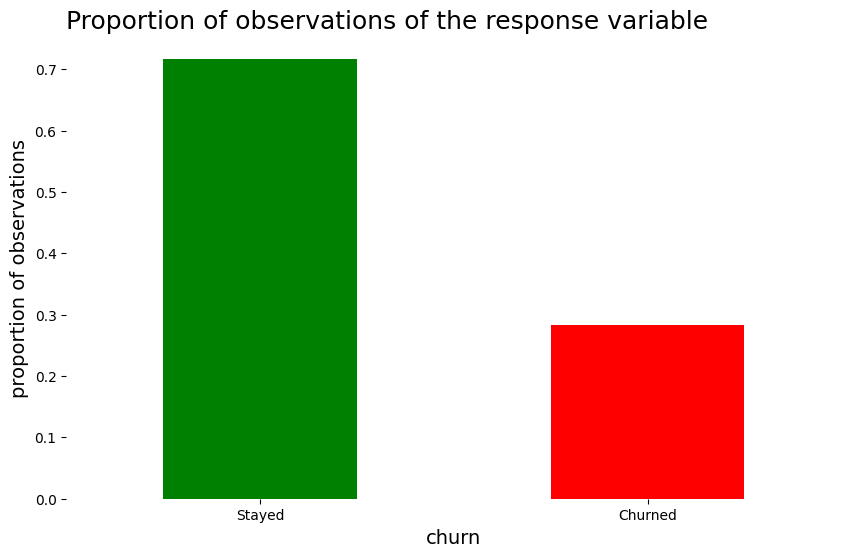

In [25]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
response = df_4['Customer Status'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
response.plot(kind='bar', 
                   ax=ax,
                   color=['green','red'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [26]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_4[column], df_4['Customer Status']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['red','green'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

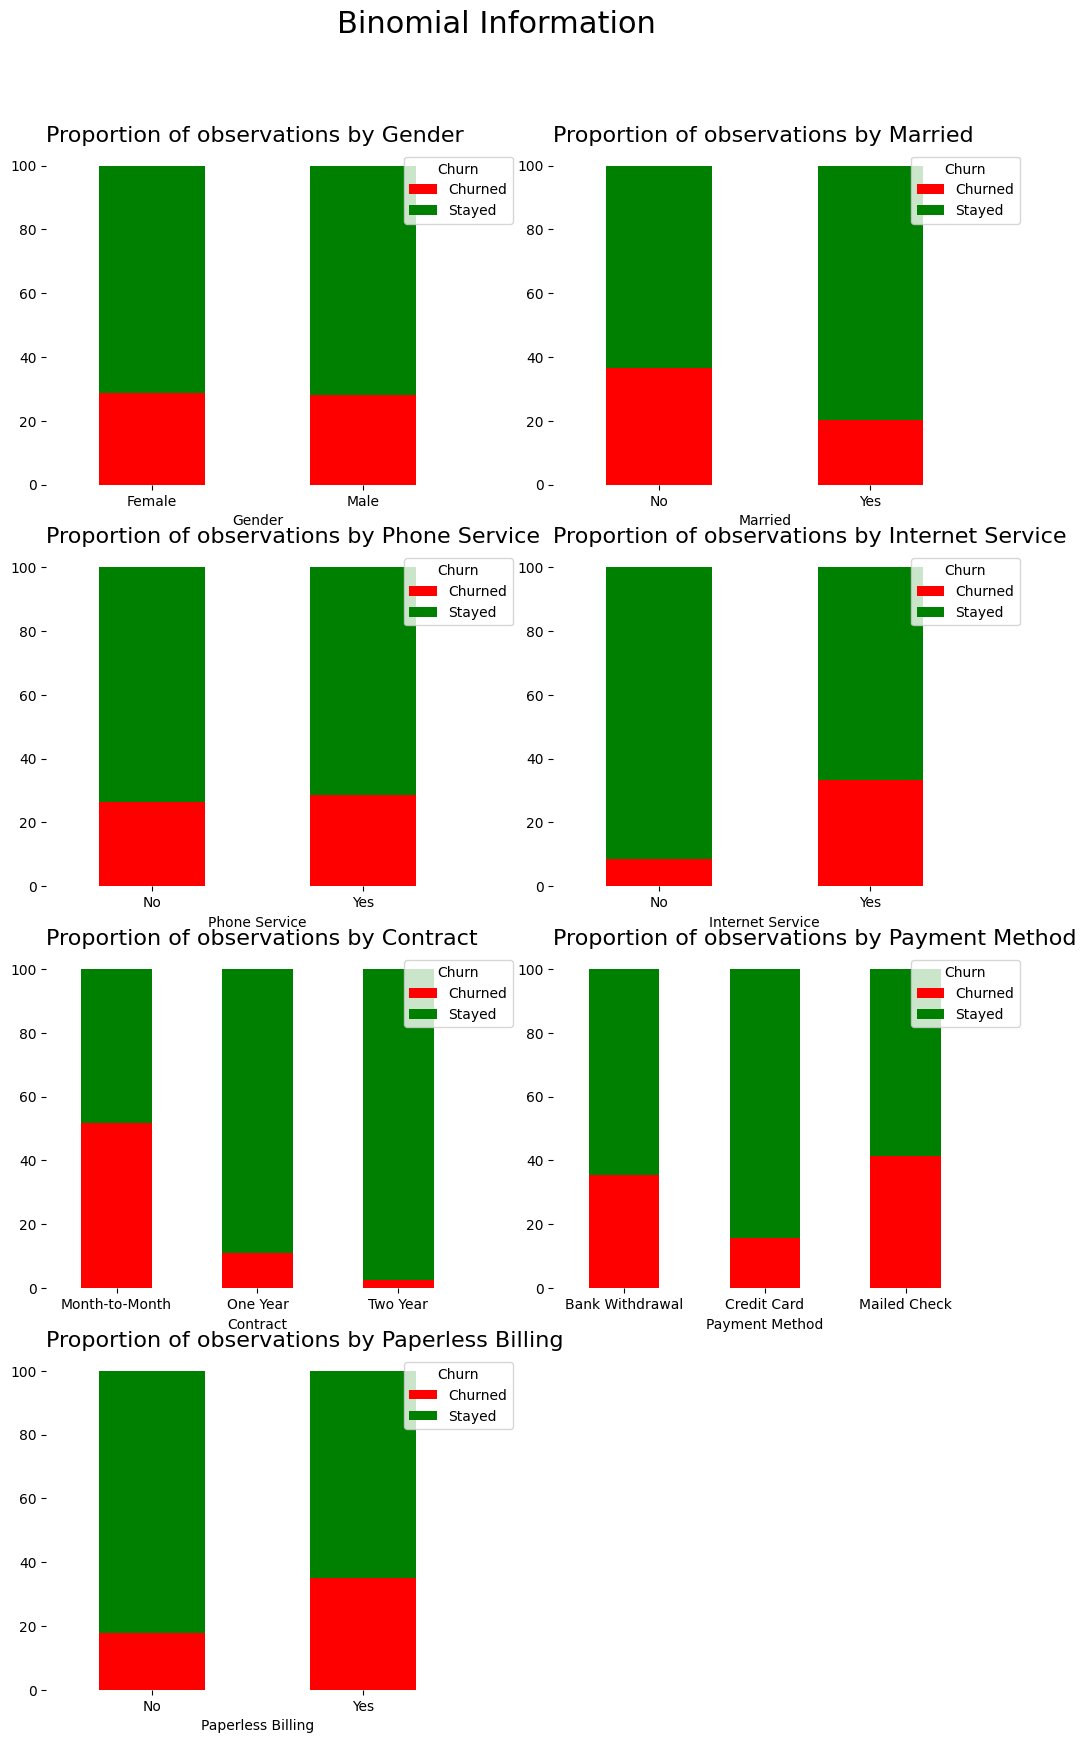

In [27]:
demographic_columns = ['Gender', 'Married', 'Phone Service', 'Internet Service', 'Contract', 'Payment Method', 'Paperless Billing']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Binomial Information')

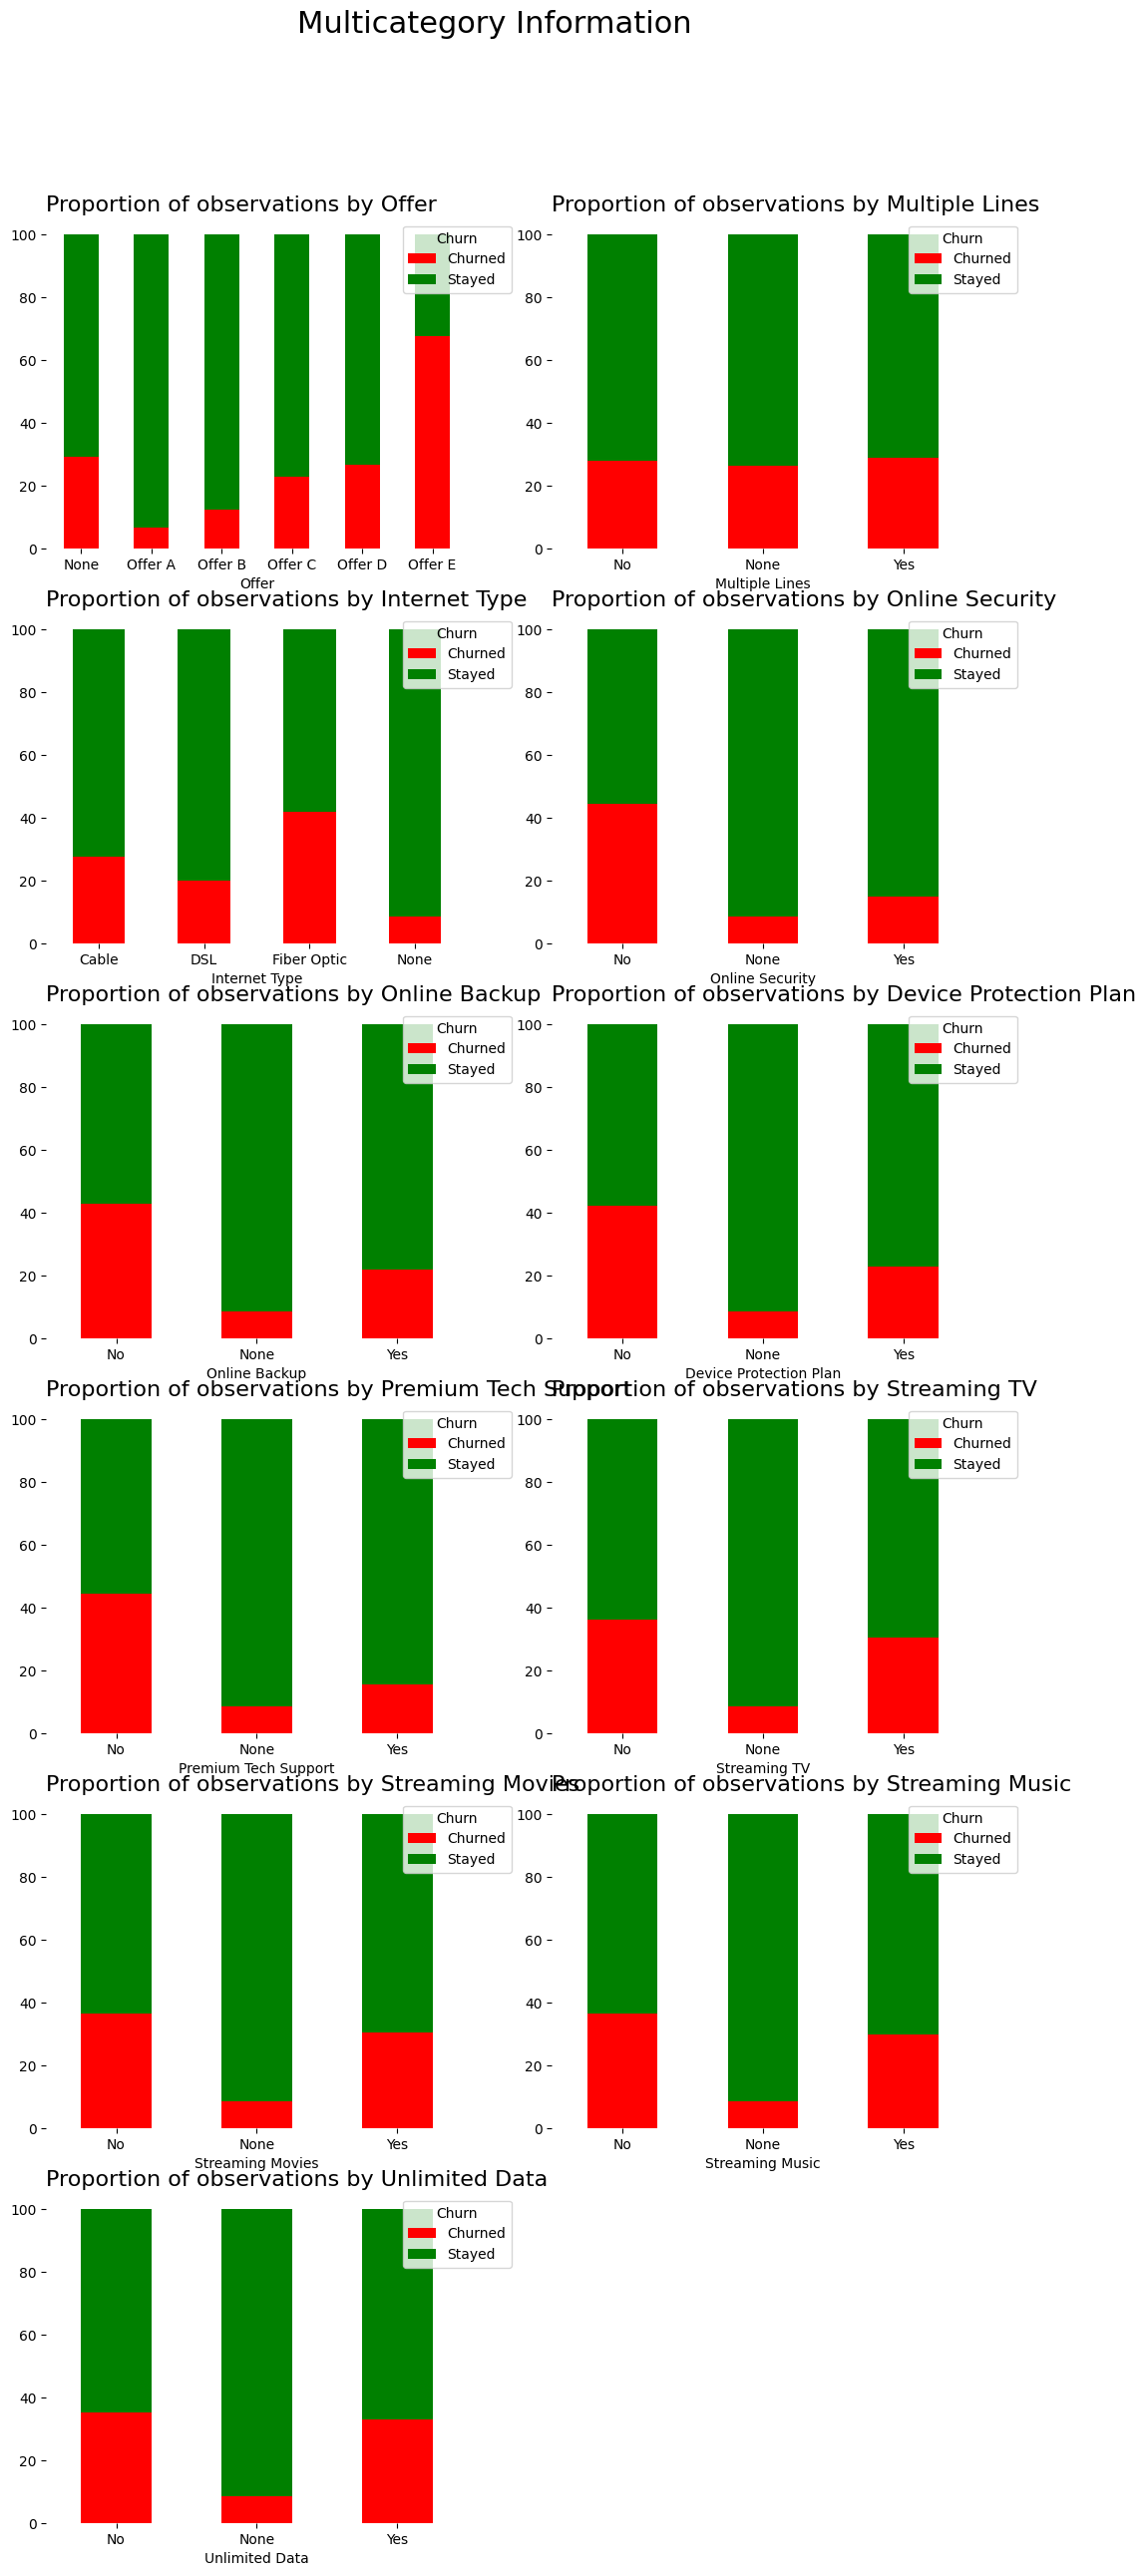

In [295]:
percentage_stacked_plot(new_none, 'Multicategory Information')

In [29]:
df_num = df_4[int_cols]

df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6583 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6583 non-null   int64  
 1   Number of Dependents               6583 non-null   int64  
 2   Number of Referrals                6583 non-null   int64  
 3   Tenure in Months                   6583 non-null   int64  
 4   Avg Monthly Long Distance Charges  6583 non-null   float64
 5   Avg Monthly GB Download            6583 non-null   float64
 6   Monthly Charge                     6583 non-null   float64
 7   Total Charges                      6583 non-null   float64
 8   Total Refunds                      6583 non-null   float64
 9   Total Extra Data Charges           6583 non-null   int64  
 10  Total Long Distance Charges        6583 non-null   float64
 11  Total Revenue                      6583 non-null   float64
 1

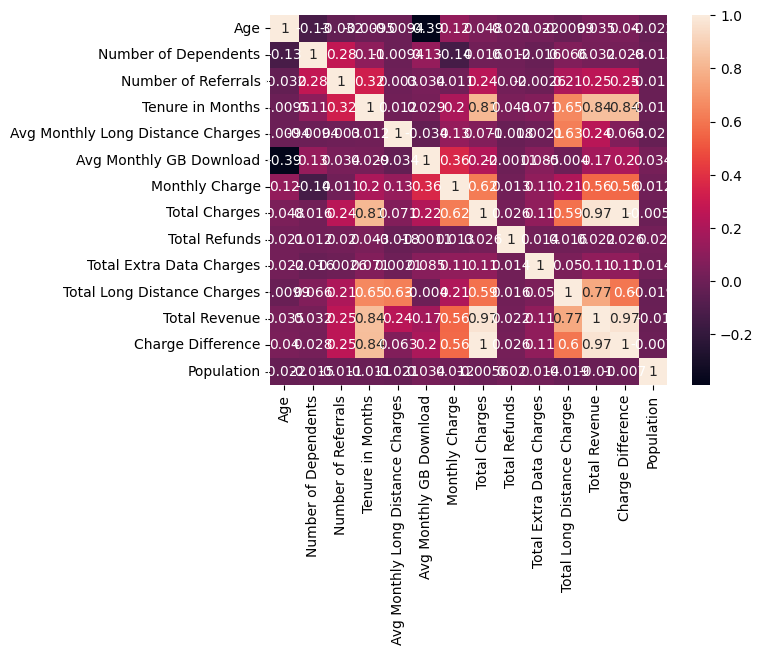

In [30]:
corr_matrix = df_num.corr()
sn.heatmap(corr_matrix, annot = True)
plt.show()

<Axes: >

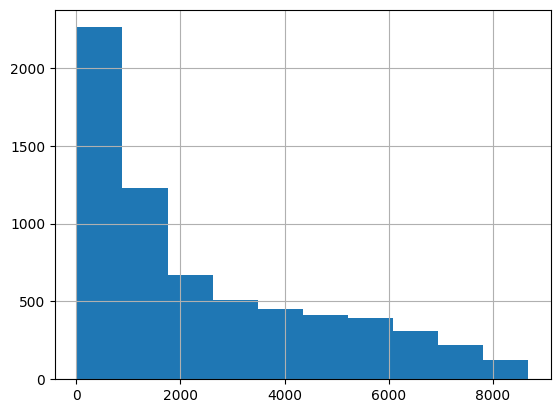

In [31]:
df_num['Total Charges'].hist()

<Axes: >

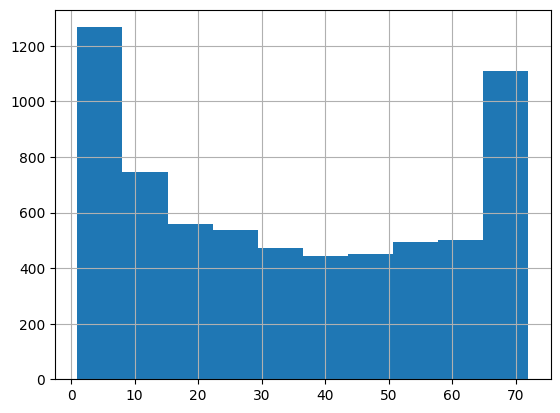

In [32]:
df_num['Tenure in Months'].hist()

<Axes: >

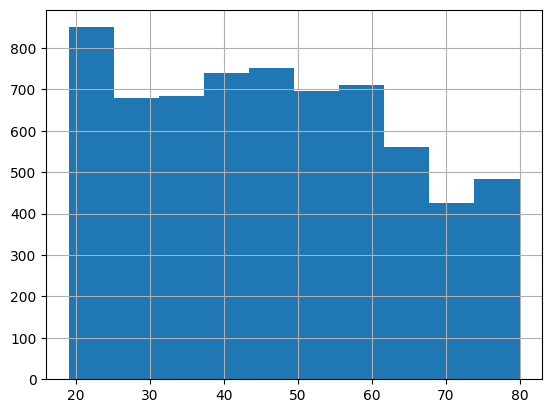

In [33]:
df_num['Age'].hist()

<Axes: >

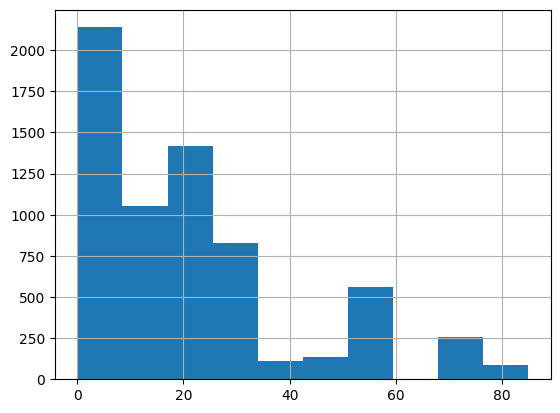

In [34]:
df_num['Avg Monthly GB Download'].hist()

array([<Axes: title={'center': 'Avg Monthly GB Download'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Avg Monthly Long Distance Charges'}, xlabel='Customer Status'>],
      dtype=object)

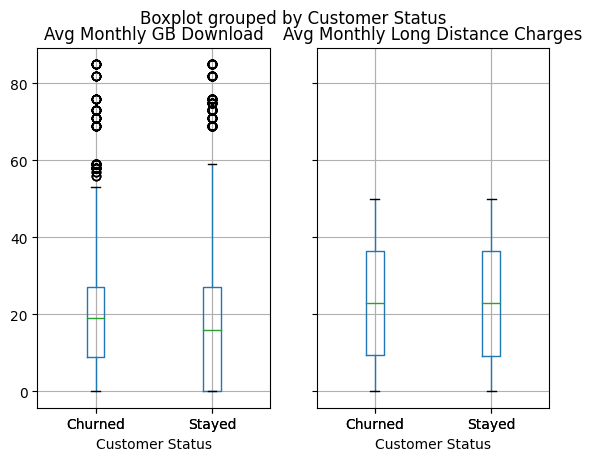

In [35]:
df_4.boxplot(column = ['Avg Monthly GB Download', 'Avg Monthly Long Distance Charges'],by = 'Customer Status')

<Axes: title={'center': 'Total Charges'}, xlabel='Customer Status'>

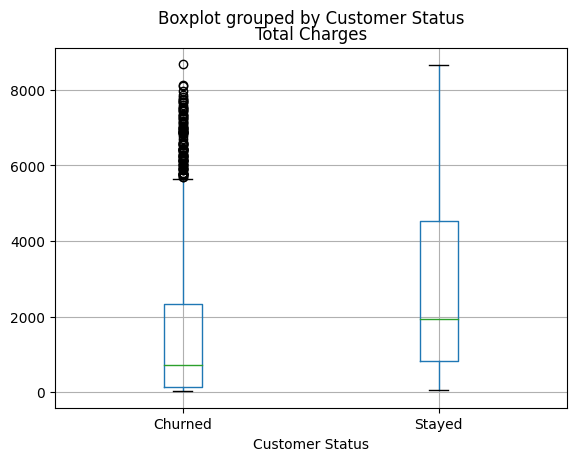

In [36]:
df_4.boxplot(column = ['Total Charges'],by = 'Customer Status')

<Axes: title={'center': 'Tenure in Months'}, xlabel='Customer Status'>

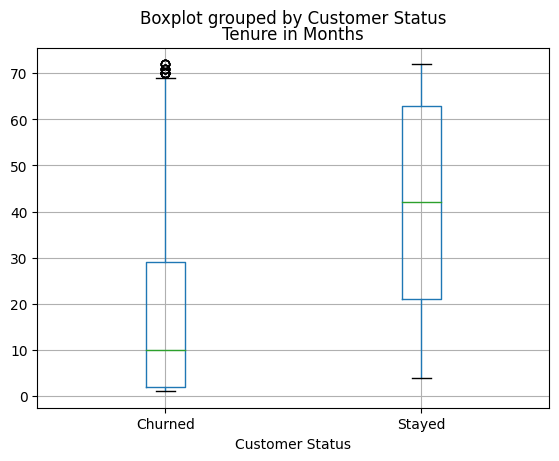

In [37]:
df_4.boxplot(column = ['Tenure in Months'],by = 'Customer Status')

<Axes: title={'center': 'Charge Difference'}, xlabel='Customer Status'>

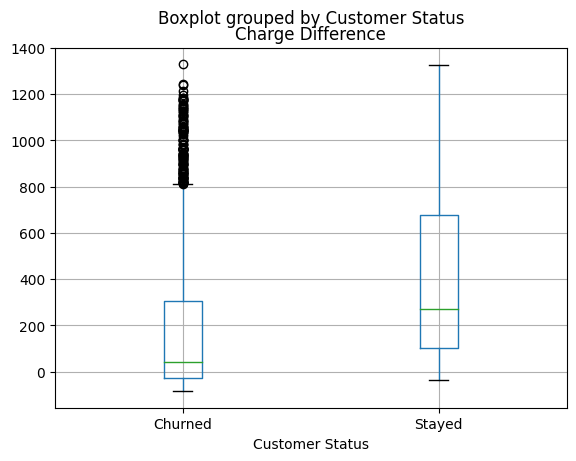

In [38]:
df_4.boxplot(column = ['Charge Difference'],by = 'Customer Status')

In [39]:
def information_gain_target(df): 
    
    ig_status = 0
    
    # your code here
    for t in df['Customer Status'].unique():
        pi = len(df[df['Customer Status'] == t])/len(df)
        ig_status += -(pi * np.log2(pi))
    return ig_status


def information_gain(p_count_yes, p_count_no):
    
#   A helper function that returns the information gain when given counts of number of yes and no values. 
#   Please complete this function before you proceed to the information_gain_attributes function below.
    
    # your code here
    ig = 0
    att_count = p_count_yes+p_count_no
    att_prop_yes = p_count_yes/att_count
    att_prop_no = p_count_no/att_count
    
    yes_gain = -(att_prop_yes*np.log2(att_prop_yes))
    no_gain = -(att_prop_no*np.log2(att_prop_no))  
    
    ig_temp = yes_gain + no_gain
    if math.isnan(ig_temp):
        ig = ig
    else:
        ig += ig_temp
    return ig


def information_gain_attributes(df, ig_status, attributes, attribute_values):

    results = {
        "ig_attributes": {
        },
        "best_attribute": ""
    }
    
    for col in df.columns:
        results['ig_attributes'][col] = 0
    
    d_range = len(df)
    
    for attribute in attributes:
        ig_attribute = 0
        value_counts = dict()
        vcount = df[attribute].value_counts()
        for att_value in attribute_values[attribute]:
            
            # your code here
            y_count = len(df[df[attribute] == att_value].query('Status == "Stayed"'))
            n_count = len(df[df[attribute] == att_value].query('Status == "Churned"'))
            
            att_prop = vcount[att_value]/d_range
            att_gain = information_gain(y_count, n_count)

            new_add = att_prop*att_gain
    
            if math.isnan(new_add):
                ig_attribute += 0
            else:
                ig_attribute += new_add
            
        
        results["ig_attributes"][attribute] = ig_status - ig_attribute
    results["ig_attributes"].pop('Status')    
    results["best_attribute"] = max(results["ig_attributes"].items(), key=operator.itemgetter(1))[0]
    return results

In [40]:
target_info_gain = information_gain_target(df_4)

In [41]:
df_attr = df_4.select_dtypes('object')
df_attr = df_attr.rename(columns = {'Customer Status': 'Status'})

In [42]:
attributes = df_attr.columns
attribute_vals = {}
for attr in attributes:
    attribute_vals[attr] = list(df_attr[attr].unique())

In [43]:
attributes

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Status'],
      dtype='object')

In [44]:
attribute_vals

{'Gender': ['Female', 'Male'],
 'Married': ['Yes', 'No'],
 'Offer': ['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
 'Phone Service': ['Yes', 'No'],
 'Multiple Lines': ['No', 'Yes', 'None'],
 'Internet Service': ['Yes', 'No'],
 'Internet Type': ['Cable', 'Fiber Optic', 'DSL', 'None'],
 'Online Security': ['No', 'Yes', 'None'],
 'Online Backup': ['Yes', 'No', 'None'],
 'Device Protection Plan': ['No', 'Yes', 'None'],
 'Premium Tech Support': ['Yes', 'No', 'None'],
 'Streaming TV': ['Yes', 'No', 'None'],
 'Streaming Movies': ['No', 'Yes', 'None'],
 'Streaming Music': ['No', 'Yes', 'None'],
 'Unlimited Data': ['Yes', 'No', 'None'],
 'Contract': ['One Year', 'Month-to-Month', 'Two Year'],
 'Paperless Billing': ['Yes', 'No'],
 'Payment Method': ['Credit Card', 'Bank Withdrawal', 'Mailed Check'],
 'Status': ['Stayed', 'Churned']}

In [45]:
gain_none = information_gain_attributes(df_attr, target_info_gain, attributes, attribute_vals)

C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:24: RuntimeWarning: divide by zero encountered in log2
  no_gain = -(att_prop_no*np.log2(att_prop_no))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:24: RuntimeWarning: invalid value encountered in double_scalars
  no_gain = -(att_prop_no*np.log2(att_prop_no))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:23: RuntimeWarning: divide by zero encountered in log2
  yes_gain = -(att_prop_yes*np.log2(att_prop_yes))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:23: RuntimeWarning: invalid value encountered in double_scalars
  yes_gain = -(att_prop_yes*np.log2(att_prop_yes))


In [46]:
# low information gain
# Gender, Phone Service, Multiple Lines -- dropping

df_5 = df_4.drop(['Gender', 'Phone Service', 'Multiple Lines'], axis = 1).replace('None', 'No')

In [47]:
for column in df_5.columns:
    print('Column: {} - Unique Values: {} - Nans: {}'.format(column, df_5[column].unique(), df_5[column].isna().sum()))

Column: Age - Unique Values: [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 79 26 30 34 42 64 48 28 33
 31 60 69 20 57 19 38 35 72 51 66 61 24 55 59 71 49 40 21 45 29 62 76 77
 73 41 56 54 22 80 63 53 44 70 74 36 27 65] - Nans: 0
Column: Married - Unique Values: ['Yes' 'No'] - Nans: 0
Column: Number of Dependents - Unique Values: [0 3 1 2 4 6 5 9 7 8] - Nans: 0
Column: Number of Referrals - Unique Values: [ 2  0  1  3  8  9 10  5  4  7  6 11] - Nans: 0
Column: Tenure in Months - Unique Values: [ 9  4 13  3 71 63  7 65 54 72  5 56 34 45  1 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42] - Nans: 0
Column: Offer - Unique Values: ['No' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C'] - Nans: 0
Column: Avg Monthly Long Distance Charges - Unique Values: [42.39 10.69 33.65 ... 10.04 25.59  2.01] - Nans: 0
Column: Internet Service - Unique Values: ['Yes' 'No'] - Nans: 

In [48]:
df_attr = df_5.select_dtypes('object')
df_attr = df_attr.rename(columns = {'Customer Status': 'Status'})

attributes = df_attr.columns
attribute_vals = {}
for attr in attributes:
    attribute_vals[attr] = list(df_attr[attr].unique())
    
gain_no = information_gain_attributes(df_attr, target_info_gain, attributes, attribute_vals)

C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:24: RuntimeWarning: divide by zero encountered in log2
  no_gain = -(att_prop_no*np.log2(att_prop_no))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:24: RuntimeWarning: invalid value encountered in double_scalars
  no_gain = -(att_prop_no*np.log2(att_prop_no))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:23: RuntimeWarning: divide by zero encountered in log2
  yes_gain = -(att_prop_yes*np.log2(att_prop_yes))
C:\Users\Joshu\AppData\Local\Temp\ipykernel_29100\3016777932.py:23: RuntimeWarning: invalid value encountered in double_scalars
  yes_gain = -(att_prop_yes*np.log2(att_prop_yes))


In [49]:
gain_none

{'ig_attributes': {'Gender': 2.50401899073438e-05,
  'Married': 0.024423712264801445,
  'Offer': 0.07691048154533875,
  'Phone Service': 0.0001586787983409721,
  'Multiple Lines': 0.0002308437856435308,
  'Internet Service': 0.0431281812385611,
  'Internet Type': 0.07004091523676437,
  'Online Security': 0.10045767388357818,
  'Online Backup': 0.07164801912600838,
  'Device Protection Plan': 0.06808296036007122,
  'Premium Tech Support': 0.09753084700446613,
  'Streaming TV': 0.04521851591008874,
  'Streaming Movies': 0.04554987510845232,
  'Streaming Music': 0.04595789020094143,
  'Unlimited Data': 0.04324412681353185,
  'Contract': 0.21048299105585289,
  'Paperless Billing': 0.02649400706053051,
  'Payment Method': 0.03686098287700135},
 'best_attribute': 'Contract'}

In [50]:
dict(sorted(gain_no['ig_attributes'].items(), key=lambda item: item[1]))

{'Streaming Music': 0.0005031528966135124,
 'Streaming Movies': 0.0010825248618047123,
 'Streaming TV': 0.0012648701139603702,
 'Device Protection Plan': 0.006320525142655242,
 'Online Backup': 0.008187610333191486,
 'Unlimited Data': 0.019174672369892676,
 'Married': 0.024423712264801445,
 'Paperless Billing': 0.02649400706053051,
 'Premium Tech Support': 0.02722611787209206,
 'Online Security': 0.029547373202267635,
 'Payment Method': 0.03686098287700135,
 'Internet Service': 0.0431281812385611,
 'Internet Type': 0.07004091523676437,
 'Offer': 0.07691048154533875,
 'Contract': 0.21048299105585289}

In [53]:
df_6 = df_4.drop(['Gender', 'Phone Service', 'Multiple Lines', 'Total Charges'], axis = 1).replace('None', 'Absent')
#df_6['Cluster'] = k
#df_6['Cluster'] = df_6['Cluster'].astype('object')

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_attr1 = df_6.select_dtypes('object')

df_num = df_6.select_dtypes(['int', 'float'])
num_columns = df_num.columns

attributes = df_attr1.columns
cat_pipe = Pipeline([('onehot', OneHotEncoder(drop = 'first'))])
num_pipe = Pipeline([('scale', scaler)])

transformer = ColumnTransformer(transformers = [('cats', cat_pipe, attributes),
                                               ('scaler', num_pipe, num_columns)], remainder = 'passthrough')

In [55]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('cats',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['Married', 'Offer', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status'],
      dtype='object')),
                                ('scaler',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Population', 'Charge Difference'],
      dtype='object'))])

In [56]:
new_cols = transformer.fit_transform(df_6)

#list(transformer.named_transformers_['cats'].named_steps['onehot'].get_feature_names_out(cat_cols))

In [57]:
new_names = list(transformer.get_feature_names_out(transformer.feature_names_in_))

#list(transformer.feature_names_in_)

In [58]:
df_7 = pd.DataFrame(new_cols, columns = new_names)

In [59]:
df_7

,cats__Married_Yes,cats__Offer_Offer A,cats__Offer_Offer B,cats__Offer_Offer C,cats__Offer_Offer D,cats__Offer_Offer E,cats__Internet Service_Yes,cats__Internet Type_Cable,cats__Internet Type_DSL,cats__Internet Type_Fiber Optic,...,scaler__Tenure in Months,scaler__Avg Monthly Long Distance Charges,scaler__Avg Monthly GB Download,scaler__Monthly Charge,scaler__Total Refunds,scaler__Total Extra Data Charges,scaler__Total Long Distance Charges,scaler__Total Revenue,scaler__Population,scaler__Charge Difference
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-1.065045,1.252833,-0.239176,0.018402,-0.256258,-0.278012,-0.488575,-0.792661,-0.830182,-0.855643
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-1.065045,-0.796537,-0.533190,-2.219056,4.459600,0.109404,-0.822707,-0.920360,0.432824,-0.685479
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-1.273688,0.687802,0.446857,0.285225,-0.256258,-0.278012,-0.777746,-0.988612,1.883073,-1.023742
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.898131,0.310899,-0.827204,1.059977,-0.256258,-0.278012,-0.511822,-0.573820,1.157666,-0.646755
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.315416,-1.010524,-0.484187,0.606699,-0.256258,-0.278012,-0.909455,-1.032720,0.977445,-1.057826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.273688,-1.357689,-1.023213,-1.416979,-0.256258,-0.278012,-0.925968,-1.101381,0.948508,-0.966967
6579,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,-0.898131,1.530177,1.867924,-0.317539,-0.256258,-0.278012,-0.224677,-0.661318,1.062230,-0.757127
6580,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,-0.522574,-0.440321,-0.190173,0.645275,-0.256258,-0.278012,-0.517983,-0.352917,-0.263364,-0.315777
6581,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.355211,-1.350577,1.818922,0.090733,-0.256258,-0.278012,-0.769033,0.536734,-0.468468,1.010199


In [60]:
cat_cols = list(df_7.columns[0:32])

number_cols = list(df_7.columns[32:])

df_cats = df_7[cat_cols]
df_nums = df_7[number_cols]

final_df = df_7.drop('cats__Customer Status_Stayed', axis = 1)
df_y = df_7['cats__Customer Status_Stayed']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(final_df, df_y, test_size=0.2, random_state=0)

In [62]:
gnb = GaussianNB()
mod = gnb.fit(X_train, y_train)
y_pred = mod.predict(X_test)

In [63]:
print("Total points: %d  | Mislabeled points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Total points: 1317  | Mislabeled points: 268


In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[295,  65],
       [203, 754]], dtype=int64)

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [66]:
# baseline of 59% for predicting accuracy of customers who will churn

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.82      0.69       360
         1.0       0.92      0.79      0.85       957

    accuracy                           0.80      1317
   macro avg       0.76      0.80      0.77      1317
weighted avg       0.83      0.80      0.80      1317



In [67]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn_mod = knn.fit(X_train, y_train)
knn_pred = knn_mod.predict(X_test)

In [68]:
knn_mod.score(X_test, y_test)

0.8109339407744874

In [69]:
confusion_matrix(y_test, knn_pred)

array([[252, 108],
       [141, 816]], dtype=int64)

In [70]:
# knn baseline 61.2% @ k = 7 and 64% @ k = 15
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.70      0.67       360
         1.0       0.88      0.85      0.87       957

    accuracy                           0.81      1317
   macro avg       0.76      0.78      0.77      1317
weighted avg       0.82      0.81      0.81      1317



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def model_lst(seed=10):

    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models


models = model_lst()

In [72]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

results = {}
for name, model in models:
    
    model.fit(X_train, y_train).predict(X_test)
    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions)
    accuracy = balanced_accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    results[name] = {'f1': f1, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

    
print(results['k_nearest_neighbors'])
print(results['logistic_regression']) # Candidate
print(results['support_vector_machines'])
print(results['random_forest'])
print(results['gradient_boosting']) # Candidate

{'f1': 0.8569898232458488, 'accuracy': 0.7651950539881573, 'precision': 0.8791208791208791, 'recall': 0.8359456635318704}
{'f1': 0.9060190073917636, 'accuracy': 0.8385536398467432, 'precision': 0.9156883671291356, 'recall': 0.896551724137931}
{'f1': 0.9081527347781216, 'accuracy': 0.8194923371647509, 'precision': 0.8970438328236493, 'recall': 0.9195402298850575}
{'f1': 0.9227662796567391, 'accuracy': 0.8247561825148032, 'precision': 0.892578125, 'recall': 0.955067920585162}
{'f1': 0.9285714285714286, 'accuracy': 0.8462774294670847, 'precision': 0.9072781655034895, 'recall': 0.9508881922675027}


In [73]:
from sklearn.model_selection import RandomizedSearchCV

gb_grid = {'n_estimators': [80, 90, 100, 110], 
                   'max_depth': [2, 4, 6, 8], 
                   'max_features': [None, 'sqrt', 'log2']}

ran_searchGB = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                           param_distributions = gb_grid,
                           cv = 5,
                           n_iter = 200,
                           n_jobs = -1)

In [74]:
mod_search = ran_searchGB.fit(X_train, y_train)

C:\Users\Joshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [75]:
mod_search.best_params_

{'n_estimators': 80, 'max_features': None, 'max_depth': 6}

In [76]:
gb_mod = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42, max_features=None)

In [77]:
gb_fit = gb_mod.fit(X_train, y_train)

In [78]:
dict(sorted(zip(gb_fit.feature_importances_, X_train.columns)))

{7.201454607352978e-05: 'cats__Offer_Offer A',
 0.00010216576291391094: 'cats__Internet Service_Yes',
 0.0005334758452806046: 'cats__Streaming TV_Yes',
 0.0005667260963213989: 'cats__Premium Tech Support_Yes',
 0.0006579937633980875: 'cats__Offer_Offer C',
 0.000667983490657452: 'cats__Streaming TV_No',
 0.0006774839028595914: 'cats__Unlimited Data_Yes',
 0.0007116667599670425: 'cats__Internet Type_DSL',
 0.0007469015796401443: 'cats__Unlimited Data_No',
 0.0007563929451830449: 'cats__Device Protection Plan_Yes',
 0.0009253728366152208: 'cats__Streaming Movies_No',
 0.0009336664991191434: 'cats__Streaming Music_No',
 0.0009772750712520857: 'cats__Online Backup_Yes',
 0.0010072090144753623: 'cats__Payment Method_Mailed Check',
 0.0012456988164231087: 'cats__Offer_Offer E',
 0.001302798798268307: 'cats__Device Protection Plan_No',
 0.001517893318313051: 'cats__Online Security_Yes',
 0.0018058691638581513: 'cats__Streaming Music_Yes',
 0.0018738118350079339: 'cats__Streaming Movies_Yes',


In [79]:
gb_pred = gb_fit.predict(X_test)

In [80]:
confusion_matrix(y_test, gb_pred)

array([[259, 101],
       [ 58, 899]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test,gb_pred)) #Winner, much better with Negative (churn) cases

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77       360
         1.0       0.90      0.94      0.92       957

    accuracy                           0.88      1317
   macro avg       0.86      0.83      0.84      1317
weighted avg       0.88      0.88      0.88      1317



In [82]:
log = LogisticRegression(penalty = 'l2', class_weight = 'balanced', solver = 'newton-cholesky')

log_mod = log.fit(X_train, y_train)

In [83]:
log_pred = log_mod.predict(X_test)

confusion_matrix(y_test, log_pred)

array([[322,  38],
       [205, 752]], dtype=int64)

In [84]:
print(classification_report(y_test,log_pred)) # Recall better but Precision/f1 better with GB
# Especially considering I am more interested in the negative cases

              precision    recall  f1-score   support

         0.0       0.61      0.89      0.73       360
         1.0       0.95      0.79      0.86       957

    accuracy                           0.82      1317
   macro avg       0.78      0.84      0.79      1317
weighted avg       0.86      0.82      0.82      1317



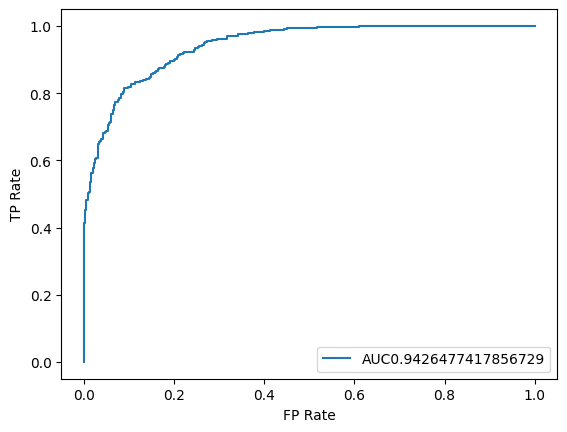

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

GB_pred_proba = mod_search.predict_proba(X_test)
GB_probs = list(GB_pred_proba[:,1])

fp, tp, _ = roc_curve(y_test, GB_probs)
auc = roc_auc_score(y_test, GB_probs)

plt.plot(fp,tp, label = 'AUC'+str(auc))
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.legend(loc=4)
plt.show()

In [86]:
df_6.columns

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Avg Monthly Long Distance Charges',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Population', 'Charge Difference'],
      dtype='object')

## Conclusion and Result
Since the dataset only consists of just over 7,000 observations, the training data consists of 80% of the overall dataset. After the elimination of the target classes that were not relevant to the exercise, that number was reduced to 6,700. The remaining 20% is held out for testing the model. In addition to the train/test split. I performed cross-validation before making predictions on the testing set.

The best model had no limit for the maximum number of features seen during the training. I used RandomizedSearchCV to estimate the best model. This model selector was chosen over GridSearchCV for efficiency purposes. The final selection of the model was based on precision and auc scores.

I used a confusion matrix as my primary evaluation method. I applied a confusion matrix from Sklearn to my baseline outcomes for my accuracy calculations. As a follow-up baseline, I decided to apply k-nearest neighbors to the data. The best performing k-neighbors was 15 and returned 61% accuracy.

The final model selected was Gradient Boosting Classifier. Using RandomizedSearchCV it was efficient to find a high-functioning model. Logistic regression provided solid results for precision, even matching the precision performance of gradient boosting in some instances. However, gradient boosting provided the best overall performance and TP vs TN tradeoff.

The model produced was highly efficient in this process with a +90% balanced accuracy and 84% precision.
